In [ ]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_excel('TempChange.xlsx')
print(df)

     Year   Jan   Feb   Mar   Apr   May   Jun   Jul   Aug   Sep   Oct   Nov  \
0    2023  52.1  52.4  60.7  65.3  75.6  84.0  89.3   NaN   NaN   NaN   NaN   
1    2022  45.8  46.2  58.5  69.5  77.9  86.1  91.8  86.8  80.6  69.1  55.0   
2    2021  47.5  41.1  61.4  64.6  71.8  82.1  84.7  85.1  80.5  72.0  57.7   
3    2020  50.3  49.6  63.4  64.6  73.8  81.9  85.7  86.0  74.7  65.0  60.4   
4    2019  45.8  50.2  55.0  66.0  73.4  79.9  84.6  87.4  85.5  65.5  53.5   
..    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
121  1902  44.0  46.0  57.8  68.7  74.8  83.2  81.6  86.7  72.8  67.2  58.5   
122  1901  50.8  45.0  56.7  62.6  71.5  82.0  85.2  85.5  77.4  70.4  57.3   
123  1900  47.3  46.7  56.3  64.5  71.6  81.9  80.7  81.2  80.6  69.8  57.8   
124  1899  42.0  35.1  55.4  61.8  75.4  79.2  81.4  87.0  76.5  69.4  58.0   
125  1898   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  77.2  64.8  51.0   

      Dec  Total  
0     NaN    NaN  
1    50.7   6

In [ ]:
df.drop('Total', axis = 1, inplace = True)
df.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,2023,52.1,52.4,60.7,65.3,75.6,84.0,89.3,NaN,NaN,NaN,NaN,NaN
1,2022,45.8,46.2,58.5,69.5,77.9,86.1,91.8,86.8,80.6,69.1,55.0,50.7
2,2021,47.5,41.1,61.4,64.6,71.8,82.1,84.7,85.1,80.5,72.0,57.7,61.3
3,2020,50.3,49.6,63.4,64.6,73.8,81.9,85.7,86.0,74.7,65.0,60.4,49.0
4,2019,45.8,50.2,55.0,66.0,73.4,79.9,84.6,87.4,85.5,65.5,53.5,50.0


In [ ]:
# Initialize a new dataframe
new_data = []

# Iterate through rows and create new data structure
for _, row in df.iterrows():
    year = int(row["Year"])
    for month in reversed(df.columns[1:]):
        new_data.append({"Year": str(month)+' '+str(year), "Value": row[month]})

# Create the new dataframe
df_temp = pd.DataFrame(new_data)

print(df_temp)

          Year  Value
0     Dec 2023    NaN
1     Nov 2023    NaN
2     Oct 2023    NaN
3     Sep 2023    NaN
4     Aug 2023    NaN
...        ...    ...
1507  May 1898    NaN
1508  Apr 1898    NaN
1509  Mar 1898    NaN
1510  Feb 1898    NaN
1511  Jan 1898    NaN

[1512 rows x 2 columns]


In [ ]:
df_temp.isnull().sum()

Year      0
Value    13
dtype: int64

In [ ]:
df_temp = df_temp.dropna()

In [ ]:
df_temp.columns = ["Month", "Temperature"]
df_temp[0:20]

,Month,Temperature
5,Jul 2023,89.3
6,Jun 2023,84.0
7,May 2023,75.6
8,Apr 2023,65.3
9,Mar 2023,60.7
10,Feb 2023,52.4
11,Jan 2023,52.1
12,Dec 2022,50.7
13,Nov 2022,55.0
14,Oct 2022,69.1


In [ ]:
df_temp.isnull().sum()

Month          0
Temperature    0
dtype: int64

In [ ]:
new_df = df_temp.iloc[::-1]

In [ ]:
new_df['Month'] = pd.to_datetime(new_df['Month'])
new_df.head()
new_df['Month'][5]

Timestamp('2023-07-01 00:00:00')

In [ ]:
new_df.isnull().sum()

Month          0
Temperature    0
dtype: int64

In [ ]:
main_df = new_df

In [ ]:
new_df.set_index('Month', inplace = True)

In [ ]:
from google.colab import files
new_df.to_csv('TempChange.csv')
files.download('TempChange.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
new_df.describe()

,Temperature
count,1499.000000
mean,65.996398
std,14.418648
min,33.800000
25%,52.600000
50%,66.200000
75%,79.800000
max,93.400000


<Axes: xlabel='Month'>

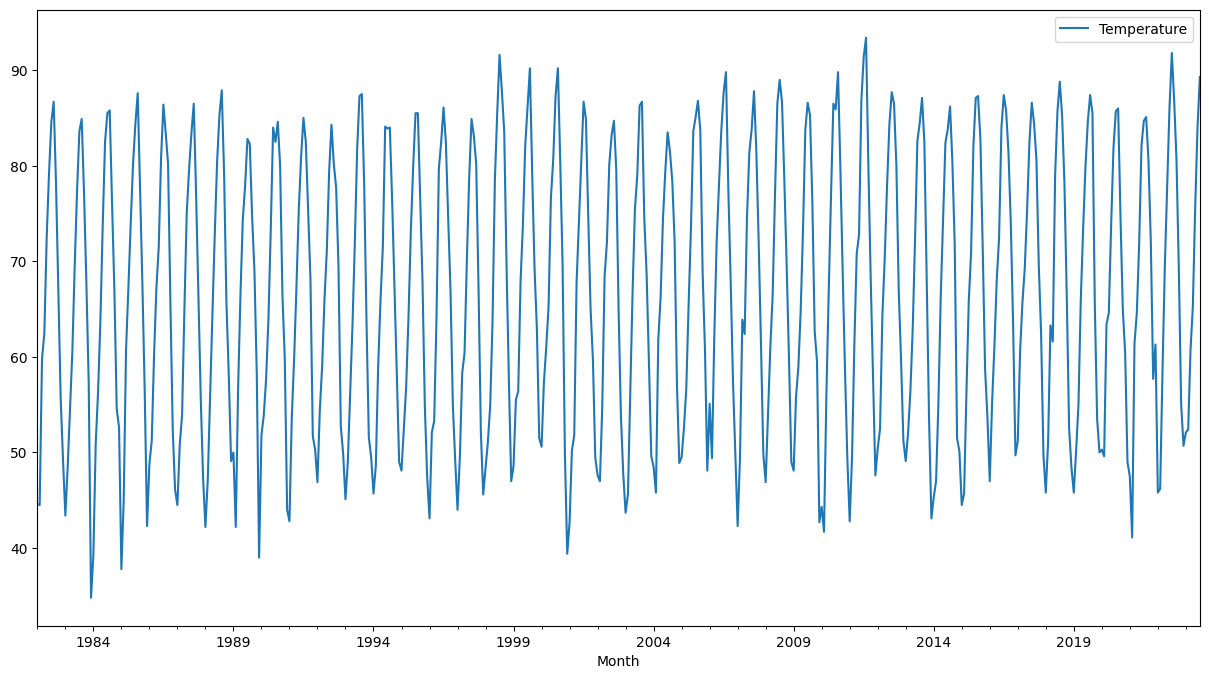

In [ ]:
new_df[1000:].plot(figsize = (15,8))

<Axes: xlabel='Month'>

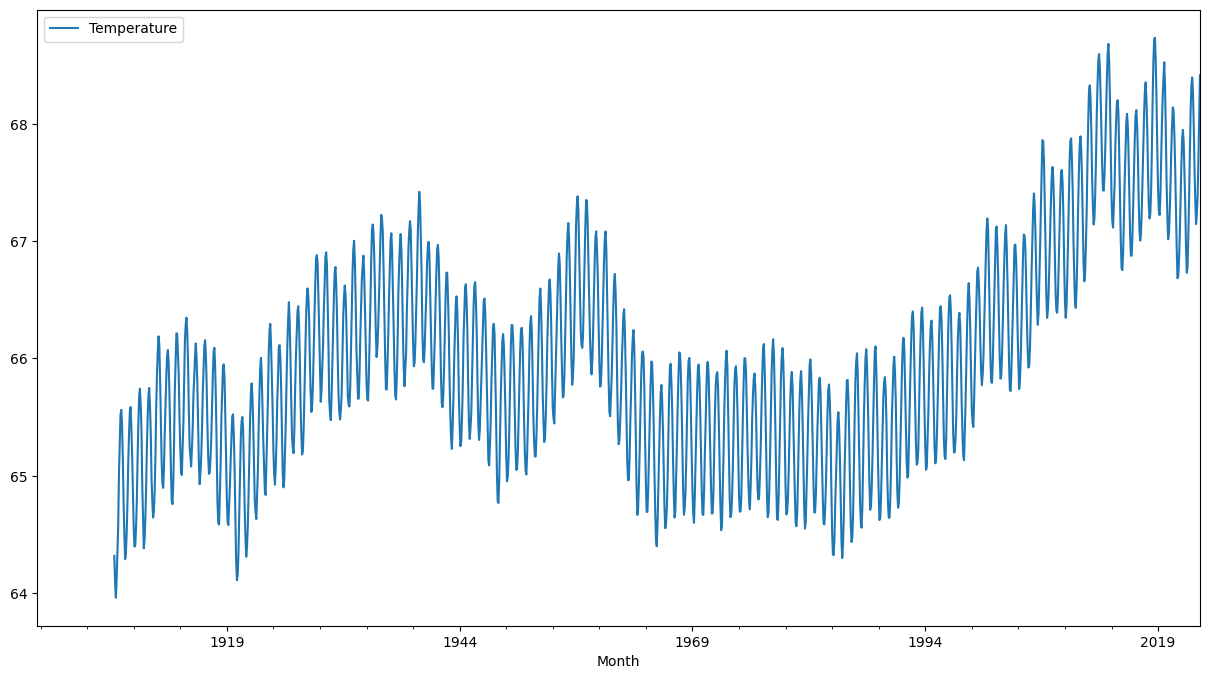

In [ ]:
new_df_mean = new_df.rolling(window = 100).mean()
new_df_mean.plot(figsize = (15,8))

In [ ]:
error_df = new_df
error_df['Forecast'] = new_df['Temperature'].shift(1)
error_df

,Temperature,Forecast
Month,,
1898-09-01,77.2,NaN
1898-10-01,64.8,77.2
1898-11-01,51.0,64.8
1898-12-01,40.9,51.0
1899-01-01,42.0,40.9
...,...,...
2023-03-01,60.7,52.4
2023-04-01,65.3,60.7
2023-05-01,75.6,65.3


In [ ]:
error_df.drop(error_df.index[0])

,Temperature,Forecast
Month,,
1898-10-01,64.8,77.2
1898-11-01,51.0,64.8
1898-12-01,40.9,51.0
1899-01-01,42.0,40.9
1899-02-01,35.1,42.0
...,...,...
2023-03-01,60.7,52.4
2023-04-01,65.3,60.7
2023-05-01,75.6,65.3


In [ ]:
error_df.isnull().sum()
error_df = error_df.dropna()

In [ ]:
error_df.isnull().sum()

Temperature    0
Forecast       0
dtype: int64

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np
temp_error = mean_squared_error(error_df.Temperature, error_df.Forecast)

In [ ]:
temp_error

71.11467957276369

In [ ]:
##testing for stationary

from statsmodels.tsa.stattools import adfuller

In [ ]:
test_result = adfuller(new_df['Temperature'])

In [ ]:
#H0 : NON STATIONARY
#H1 : STATIONARY

def adfuller_test(temp):
  result = adfuller(temp)
  labels = ['ADF Test Statistic', 'p-value', '#Lags used', 'No of observations used']
  for value,label in zip(result, labels):
    print(label+' : '+str(value))
  if result[1] <= 0.05:
    print('strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is STATIONARY')
  else:
    print('Weak evidence against null hypothesis, time series has a unit root. NON STATIONARY')

In [ ]:
adfuller_test(new_df['Temperature'])          #p value < 0.05 so we reject alternate hypothesis , no unit root, stationary

ADF Test Statistic : -4.412592921150153
p-value : 0.0002819652519310663
#Lags used : 24
No of observations used : 1474
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is STATIONARY


So p < 0.05, so our d value is 0

In [ ]:
new_df['Temperature First Difference'] = new_df['Temperature'] - new_df['Temperature'].shift(1)

In [ ]:
new_df['Temperature Twelve Difference'] = new_df['Temperature'] - new_df['Temperature'].shift(12)

In [ ]:
new_df.head()

,Temperature,Forecast,Temperature First Difference,Temperature Twelve Difference
Month,,,,
1898-09-01,77.2,NaN,NaN,NaN
1898-10-01,64.8,77.2,-12.4,NaN
1898-11-01,51.0,64.8,-13.8,NaN
1898-12-01,40.9,51.0,-10.1,NaN
1899-01-01,42.0,40.9,1.1,NaN


In [ ]:
adfuller_test(new_df['Temperature First Difference'].dropna())

ADF Test Statistic : -15.76485681224968
p-value : 1.1797988485204568e-28
#Lags used : 23
No of observations used : 1474
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is STATIONARY


In [ ]:
adfuller_test(new_df['Temperature Twelve Difference'].dropna())

ADF Test Statistic : -11.2417477569723
p-value : 1.7999447766023333e-20
#Lags used : 24
No of observations used : 1462
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is STATIONARY


<Axes: xlabel='Month'>

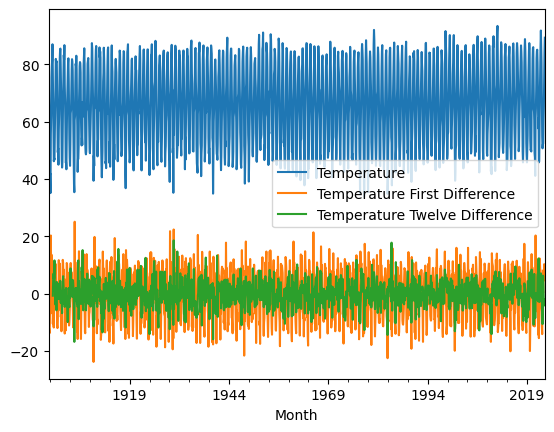

In [ ]:
new_df[['Temperature', 'Temperature First Difference', 'Temperature Twelve Difference']].plot()

<Axes: xlabel='Month'>

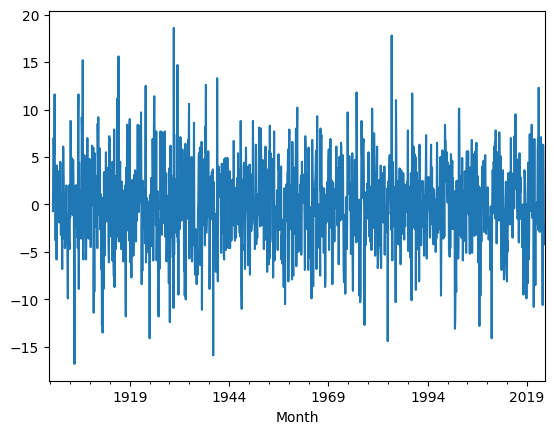

In [ ]:
new_df['Temperature Twelve Difference'].plot()

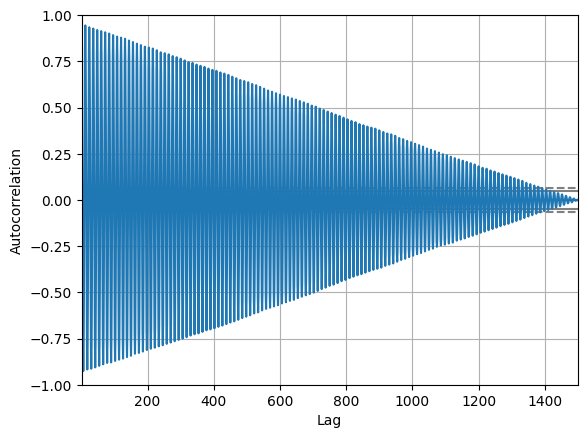

In [ ]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(new_df['Temperature'])
plt.show()

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels as sm   #d=0 (no differencing), p= 2 , q=2

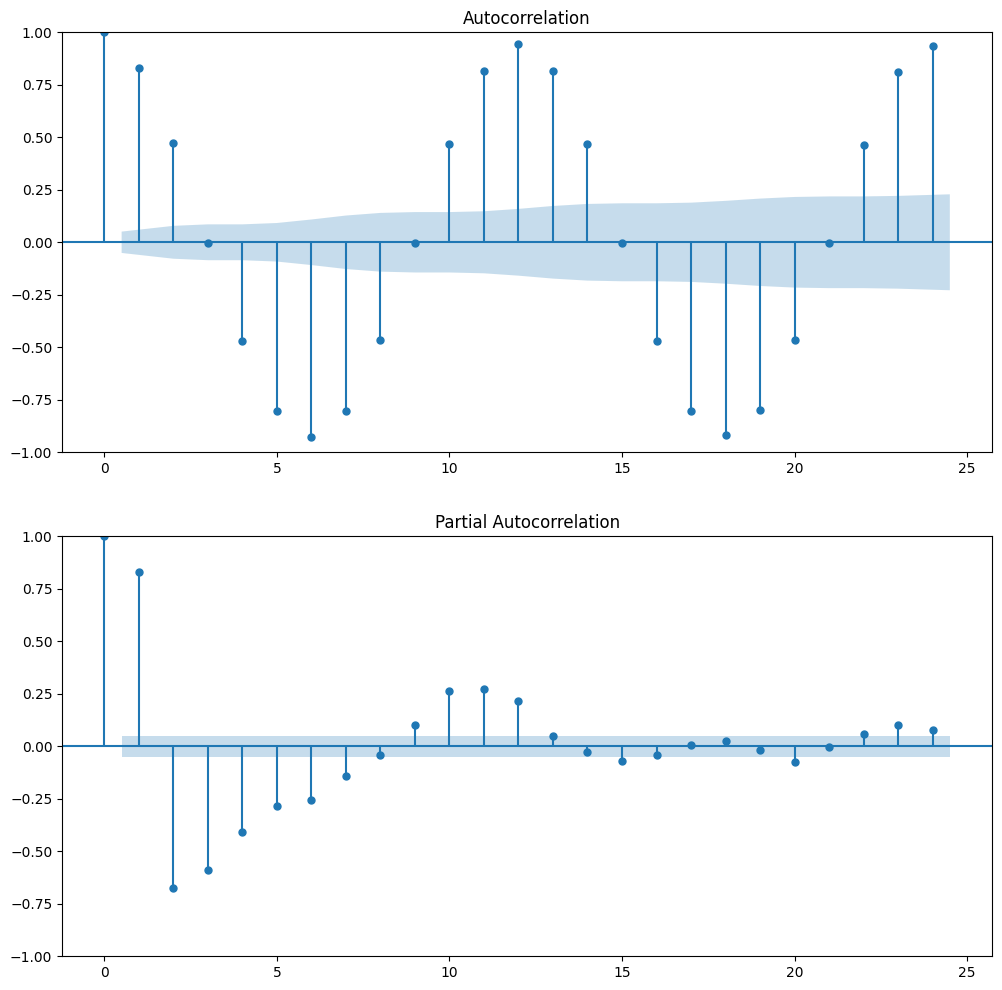

In [ ]:
fig = plt.figure(figsize=(12,12))
ax1 = fig.add_subplot(211)
fig = plot_acf(new_df['Temperature'].iloc[13:], lags=24, ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(new_df['Temperature'].iloc[13:], lags=24, ax=ax2)

In [ ]:
p = d = q = range(0, 3)  #  give range
from itertools import product
import statsmodels.api as sm
pdq = list(product(p, d, q))

# Find the best ARIMA parameters using AIC
best_aic = np.inf
best_params = None
print(pdq)

for param in pdq:
        model = sm.tsa.ARIMA(new_df['Temperature'], order=param)
        results = model.fit()
        aic = results.aic
        if aic < best_aic:
            best_aic = aic
            best_params = param

print("Best AIC:", best_aic)
print("Best ARIMA Parameters:", best_params)

[(0, 0, 0), (0, 0, 1), (0, 0, 2), (0, 1, 0), (0, 1, 1), (0, 1, 2), (0, 2, 0), (0, 2, 1), (0, 2, 2), (1, 0, 0), (1, 0, 1), (1, 0, 2), (1, 1, 0), (1, 1, 1), (1, 1, 2), (1, 2, 0), (1, 2, 1), (1, 2, 2), (2, 0, 0), (2, 0, 1), (2, 0, 2), (2, 1, 0), (2, 1, 1), (2, 1, 2), (2, 2, 0), (2, 2, 1), (2, 2, 2)]


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_date

Best AIC: 8033.63216661317
Best ARIMA Parameters: (2, 0, 2)


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
# from sklearn.model_selection import train_test_split
# train_ratio = 0.80
# train_df, test_df = train_test_split(new_df, train_size=train_ratio, shuffle=True, random_state=42)
model = ARIMA(new_df['Temperature'], order=(2,0,2))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
model_fit=model.fit()

In [ ]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            Temperature   No. Observations:                 1499
Model:                 ARIMA(2, 0, 2)   Log Likelihood               -4010.816
Date:                Wed, 23 Aug 2023   AIC                           8033.632
Time:                        20:00:08   BIC                           8065.507
Sample:                    09-01-1898   HQIC                          8045.507
                         - 07-01-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         66.0087      0.099    664.168      0.000      65.814      66.204
ar.L1          1.7321   6.87e-05   2.52e+04      0.000       1.732       1.732
ar.L2         -1.0000   1.47e-05  -6.79e+04      0.000      -1.000      -1.000
ma.L1         -1.7219      0.020    -85.189      0.000      -1.761      -1.682
ma.L2          0.9997      0.024     42.461      0.000       0.954       1.046
sigma2        12.1981      0.463     26.370      0.000      11.291      13.105
===================================================================================
Ljung-Box (L1) (Q):                  75.20   Jarque-Bera (JB):                29.88
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.85   Skew:                            -0.05
Prob(H) (two-sided):                  0.06   Kurtosis:                         3.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
new_df

,Temperature,Forecast,Temperature First Difference,Temperature Twelve Difference
Month,,,,
1898-09-01,77.2,NaN,NaN,NaN
1898-10-01,64.8,77.2,-12.4,NaN
1898-11-01,51.0,64.8,-13.8,NaN
1898-12-01,40.9,51.0,-10.1,NaN
1899-01-01,42.0,40.9,1.1,NaN
...,...,...,...,...
2023-03-01,60.7,52.4,8.3,2.2
2023-04-01,65.3,60.7,4.6,-4.2
2023-05-01,75.6,65.3,10.3,-2.3


In [ ]:
forecast_steps = 17  # Number of time steps to forecast ahead
forecast_arima = model_fit.forecast(steps=forecast_steps) #end of year 2024

print("Forecasted values:", forecast_arima)
# print("Standard errors of the forecast:", stderr)
# print("Confidence intervals:", conf_int)

Forecasted values: 2023-08-01    83.792779
2023-09-01    77.074616
2023-10-01    67.391739
2023-11-01    57.338443
2023-12-01    49.608232
2024-01-01    46.272168
2024-02-01    48.224000
2024-03-01    54.940722
2024-04-01    64.622715
2024-05-01    74.675921
2024-06-01    82.406863
2024-07-01    85.744280
2024-08-01    83.794062
2024-09-01    77.078782
2024-10-01    67.397674
2024-11-01    57.344556
2024-12-01    49.612885
Freq: MS, Name: predicted_mean, dtype: float64


In [ ]:
forecast_arima = pd.DataFrame(forecast_arima)
forecast_arima
max_temperature = forecast_arima.max()
max_temperature

predicted_mean    85.74428
dtype: float64

### ***max temperature using ARIMA : 85.74428***

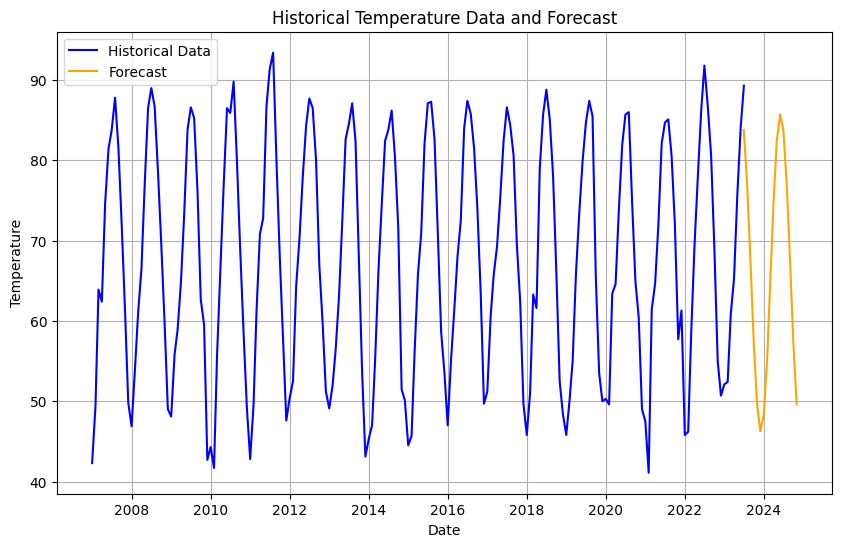

In [ ]:
# Convert the index of 'new_df' to datetime if not already
new_df.index = pd.to_datetime(new_df.index)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(new_df.index[1300:1782], new_df['Temperature'][1300:1782], label='Historical Data', color='blue')
plt.plot(pd.date_range(start=new_df.index[-3], periods=len(forecast)+1, freq='M')[1:], forecast, label='Forecast', color='orange')

plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Historical Temperature Data and Forecast')
plt.legend()
plt.grid(True)
plt.show()

FBprophet

In [ ]:
df_p = df_temp.iloc[::-1]

In [ ]:
df_p

,Month,Temperature
1503,Sep 1898,77.2
1502,Oct 1898,64.8
1501,Nov 1898,51.0
1500,Dec 1898,40.9
1499,Jan 1899,42.0
...,...,...
9,Mar 2023,60.7
8,Apr 2023,65.3
7,May 2023,75.6
6,Jun 2023,84.0


In [ ]:
df_p.columns =["ds", "y"]

In [ ]:
df_p['ds'] = pd.to_datetime(df_p['ds'])


In [ ]:
!pip install pystan
!conda install -c conda-forge fbprophet
!pip install --upgrade pip setuptools

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 MB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 62.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 5.6 MB/s eta 0:00:00
/bin/bash: line 1: conda: command not found
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 805.1/805.1 kB 20.0 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 67.7.2
    Uninstalling setuptools-67.7.2:
      Successfully uninstalled setuptools-67.7.2
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependenc

In [ ]:
!pip install fbprophet
# import fbprophet
from fbprophet import Prophet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for fbprophet
  Running setup.py clean for fbprophet
Failed to build fbprophet
ERROR: Could not build wheels for fbprophet, which is required to install pyproject.toml-based projects


ModuleNotFoundError: ignored

In [ ]:
# Create a Prophet object and fit it to the data
from prophet import Prophet
m = Prophet()
m.fit(df_p)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpyiy_oi9i/alt47x9b.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpyiy_oi9i/x6pr3i21.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12649', 'data', 'file=/tmp/tmpyiy_oi9i/alt47x9b.json', 'init=/tmp/tmpyiy_oi9i/x6pr3i21.json', 'output', 'file=/tmp/tmpyiy_oi9i/prophet_modeladn04qga/prophet_model-20230823200212.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:02:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:02:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
df_p.columns

Index(['ds', 'y'], dtype='object')

In [ ]:
m.component_modes

{'additive': ['yearly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

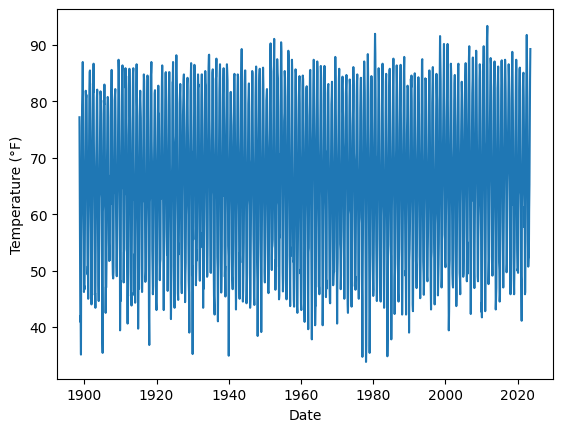

In [ ]:
# Visualize the data
plt.plot(df_p['ds'], df_p['y'])
plt.xlabel('Date')
plt.ylabel('Temperature (°F)')
plt.show()

In [ ]:
# Create a future dataframe
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
1859,2024-06-26
1860,2024-06-27
1861,2024-06-28
1862,2024-06-29
1863,2024-06-30


In [ ]:
# Make predictions for the future dates
forecast = m.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1859,2024-06-26,68.63034,84.440295,92.602822,68.63034,68.63034,19.942551,19.942551,19.942551,19.942551,19.942551,19.942551,0.0,0.0,0.0,88.572891
1860,2024-06-27,68.63054,84.303491,91.947366,68.63054,68.63054,19.630709,19.630709,19.630709,19.630709,19.630709,19.630709,0.0,0.0,0.0,88.261249
1861,2024-06-28,68.63074,84.095736,91.841895,68.63074,68.63074,19.341942,19.341942,19.341942,19.341942,19.341942,19.341942,0.0,0.0,0.0,87.972682
1862,2024-06-29,68.63094,83.678569,91.659292,68.63094,68.63094,19.086122,19.086122,19.086122,19.086122,19.086122,19.086122,0.0,0.0,0.0,87.717061
1863,2024-06-30,68.63114,83.565202,91.554086,68.63114,68.63114,18.872001,18.872001,18.872001,18.872001,18.872001,18.872001,0.0,0.0,0.0,87.503140


In [ ]:
forecast['ds'] = pd.to_datetime(forecast['ds'])
# Filter the DataFrame for the year 2024
forecast_2024 = forecast[forecast['ds'].dt.year == 2024]
# Find the maximum 'yhat' value in the filtered DataFrame
max_yhat_2024 = forecast_2024['yhat'].max()
print("Maximum yhat value for 2024:", max_yhat_2024)

Maximum yhat value for 2024: 90.61956395756513


### ***max temperature using fbprophet : 90.61956395756513***

In [ ]:
forecast_2024.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1859,2024-06-26,68.63034,84.440295,92.602822,68.63034,68.63034,19.942551,19.942551,19.942551,19.942551,19.942551,19.942551,0.0,0.0,0.0,88.572891
1860,2024-06-27,68.63054,84.303491,91.947366,68.63054,68.63054,19.630709,19.630709,19.630709,19.630709,19.630709,19.630709,0.0,0.0,0.0,88.261249
1861,2024-06-28,68.63074,84.095736,91.841895,68.63074,68.63074,19.341942,19.341942,19.341942,19.341942,19.341942,19.341942,0.0,0.0,0.0,87.972682
1862,2024-06-29,68.63094,83.678569,91.659292,68.63094,68.63094,19.086122,19.086122,19.086122,19.086122,19.086122,19.086122,0.0,0.0,0.0,87.717061
1863,2024-06-30,68.63114,83.565202,91.554086,68.63114,68.63114,18.872001,18.872001,18.872001,18.872001,18.872001,18.872001,0.0,0.0,0.0,87.503140


In [ ]:
filtered_data = forecast[(forecast['ds'].dt.year >= 2015)]

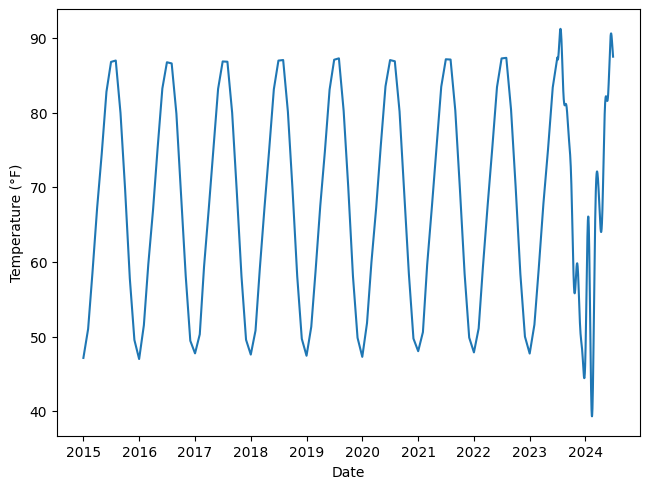

In [ ]:
# Visualize the data
plt.plot(filtered_data['ds'], filtered_data['yhat'])
plt.tight_layout()
plt.xlabel('Date')
plt.ylabel('Temperature (°F)')
plt.show()

### ***Max temperature using Power BI - 85.90***